# **Experiment-1**
### **Baseline with layer hieght = 0.3mm**

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
data = pd.read_csv("/content/baseline_l3.csv")

In [188]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-11-30 12:32:27,24.04,0.06,1.4,0.097,0.000038
1,2025-11-30 12:32:29,24.03,0.06,1.4,2.123,0.000863
2,2025-11-30 12:32:31,24.03,0.06,1.4,2.123,0.001689
3,2025-11-30 12:32:33,24.03,0.06,1.4,2.124,0.002515
4,2025-11-30 12:32:36,24.03,0.06,1.4,2.122,0.003340


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               3057 non-null   object 
 1   Voltage (V)             3057 non-null   float64
 2   Current (A)             3057 non-null   float64
 3   Power (W)               3057 non-null   float64
 4   Delta Time (s)          3057 non-null   float64
 5   Cumulative Energy (Wh)  3057 non-null   float64
dtypes: float64(5), object(1)
memory usage: 143.4+ KB


In [190]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [191]:
data['Time_seconds'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()

In [192]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh),Time_seconds
0,2025-11-30 12:32:27,24.04,0.06,1.4,0.097,0.000038,0.0
1,2025-11-30 12:32:29,24.03,0.06,1.4,2.123,0.000863,2.0
2,2025-11-30 12:32:31,24.03,0.06,1.4,2.123,0.001689,4.0
3,2025-11-30 12:32:33,24.03,0.06,1.4,2.124,0.002515,6.0
4,2025-11-30 12:32:36,24.03,0.06,1.4,2.122,0.003340,9.0


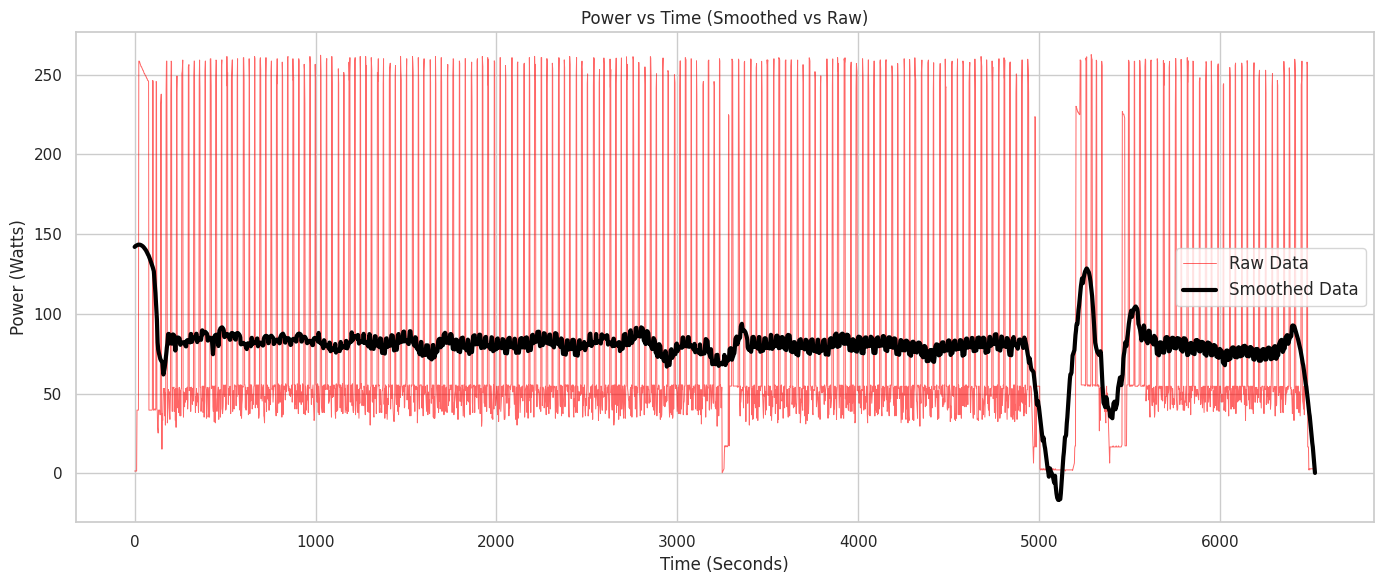

In [195]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 101   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
data['power_smooth'] = savgol_filter(data['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


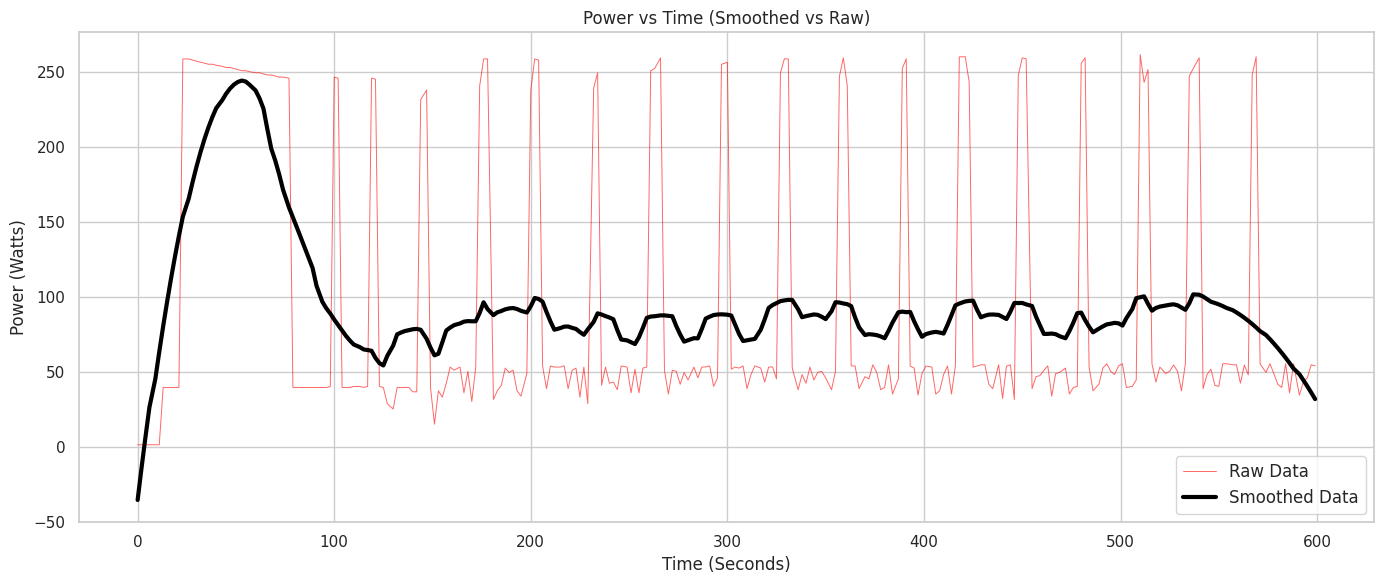

In [196]:
data_subset = data[data['Time_seconds'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data_subset,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data_subset,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [197]:
data['Time_seconds'].max()

6525.0

In [198]:
data['Time_seconds'].max()//60

108.0

In [199]:
data['Power (W)'].mean()

np.float64(79.47877003598299)

In [200]:
data['Cumulative Energy (Wh)'].max()

143.38561316296827

### **Baseline with layer hieght = 0.2mm**

In [202]:
data = pd.read_csv("/content/baseline_l2.csv")

In [203]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,30-11-2025 14:41,24.04,0.06,1.4,0.094,0.000037
1,30-11-2025 14:41,24.04,0.09,2.1,2.129,0.001278
2,30-11-2025 14:41,24.04,0.06,1.4,2.121,0.002103
3,30-11-2025 14:41,24.04,0.06,1.4,2.120,0.002927
4,30-11-2025 14:41,24.04,0.06,1.4,2.128,0.003755


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               3546 non-null   object 
 1   Voltage (V)             3546 non-null   float64
 2   Current (A)             3546 non-null   float64
 3   Power (W)               3546 non-null   float64
 4   Delta Time (s)          3546 non-null   float64
 5   Cumulative Energy (Wh)  3546 non-null   float64
dtypes: float64(5), object(1)
memory usage: 166.3+ KB


In [205]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], dayfirst=True)

In [206]:
# time_in_sec = cummulative sum of delta TIme column
data['Time_seconds'] = data['Delta Time (s)'].cumsum()

In [207]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh),Time_seconds
0,2025-11-30 14:41:00,24.04,0.06,1.4,0.094,0.000037,0.094
1,2025-11-30 14:41:00,24.04,0.09,2.1,2.129,0.001278,2.223
2,2025-11-30 14:41:00,24.04,0.06,1.4,2.121,0.002103,4.344
3,2025-11-30 14:41:00,24.04,0.06,1.4,2.120,0.002927,6.464
4,2025-11-30 14:41:00,24.04,0.06,1.4,2.128,0.003755,8.592


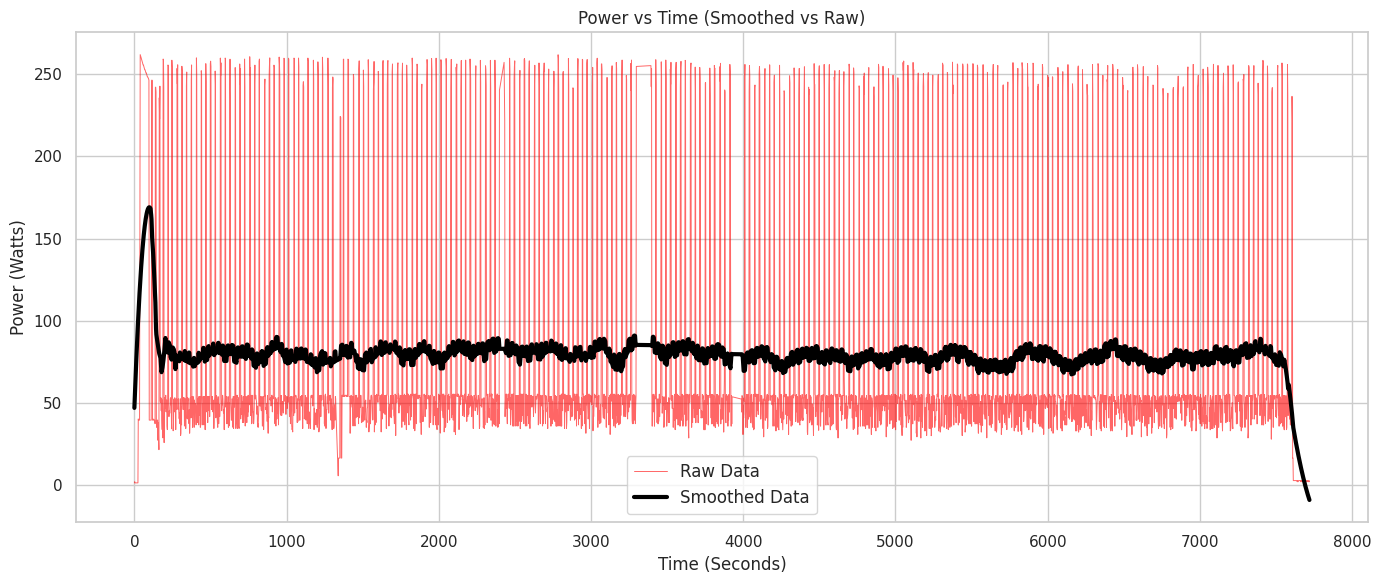

In [210]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 101   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
data['power_smooth'] = savgol_filter(data['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


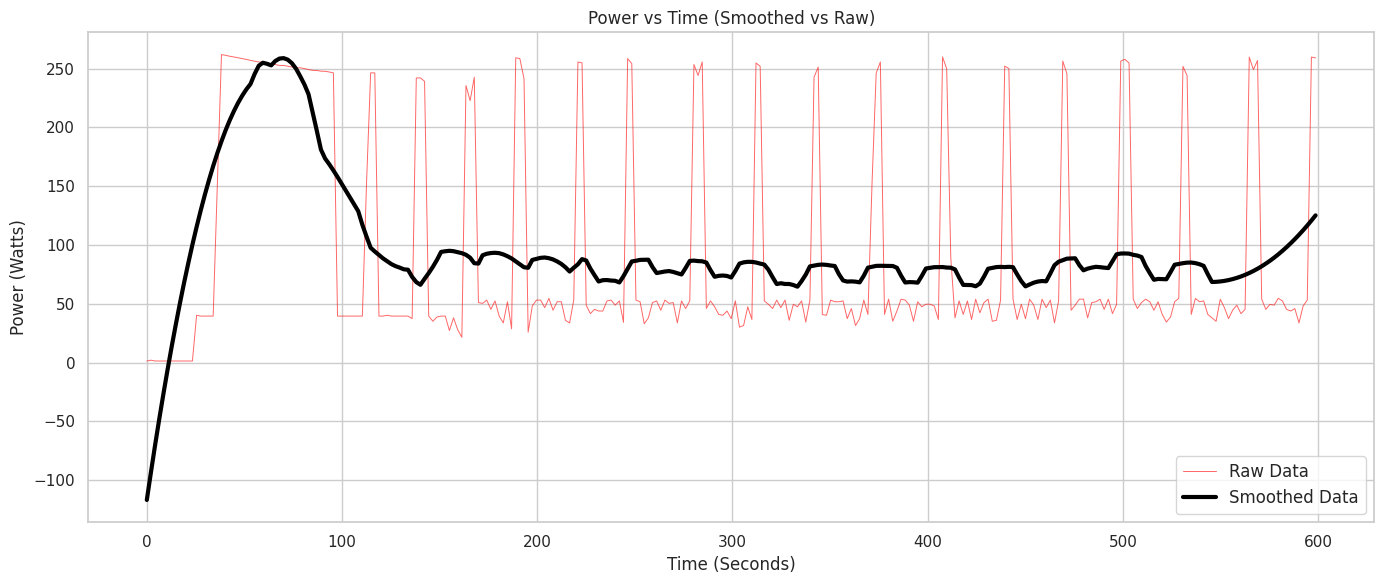

In [211]:
data_subset = data[data['Time_seconds'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data_subset,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data_subset,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [212]:
data['Time_seconds'].max()

7719.331000000019

In [213]:
data['Time_seconds'].max()//60

128.0

In [214]:
data['Power (W)'].mean()

np.float64(78.7858432036097)

In [215]:
data['Cumulative Energy (Wh)'].max() * 3.6

627.67015056

### **Baseline with layer hieght = 0.1mm**

In [216]:
data = pd.read_csv("/content/baseline_l1.csv")

In [217]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-11-30 17:05:11,24.00,1.65,39.6,0.094,0.001036
1,2025-11-30 17:05:13,23.85,1.65,39.3,2.125,0.024234
2,2025-11-30 17:05:15,23.69,10.47,248.0,2.118,0.170145
3,2025-11-30 17:05:17,23.68,10.47,247.9,2.129,0.316753
4,2025-11-30 17:05:20,23.67,10.41,246.4,2.121,0.461930


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               6442 non-null   object 
 1   Voltage (V)             6442 non-null   float64
 2   Current (A)             6442 non-null   float64
 3   Power (W)               6442 non-null   float64
 4   Delta Time (s)          6442 non-null   float64
 5   Cumulative Energy (Wh)  6442 non-null   float64
dtypes: float64(5), object(1)
memory usage: 302.1+ KB


In [219]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [220]:
data['Time_seconds'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()

In [221]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh),Time_seconds
0,2025-11-30 17:05:11,24.00,1.65,39.6,0.094,0.001036,0.0
1,2025-11-30 17:05:13,23.85,1.65,39.3,2.125,0.024234,2.0
2,2025-11-30 17:05:15,23.69,10.47,248.0,2.118,0.170145,4.0
3,2025-11-30 17:05:17,23.68,10.47,247.9,2.129,0.316753,6.0
4,2025-11-30 17:05:20,23.67,10.41,246.4,2.121,0.461930,9.0


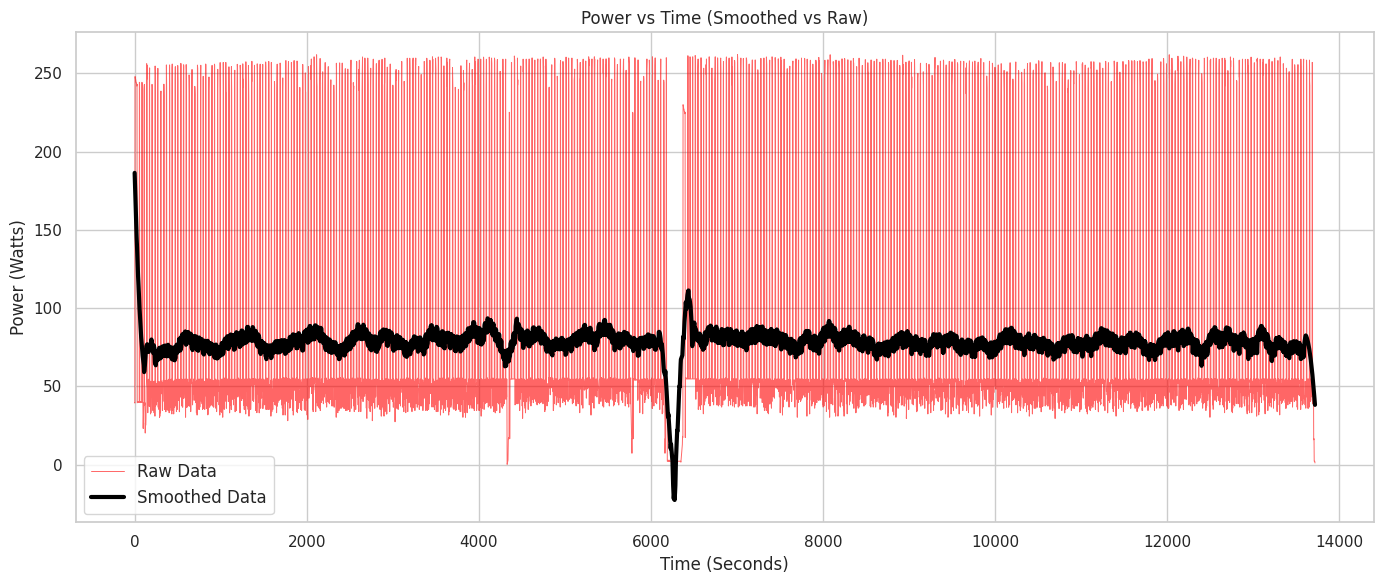

In [224]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 101   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
data['power_smooth'] = savgol_filter(data['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


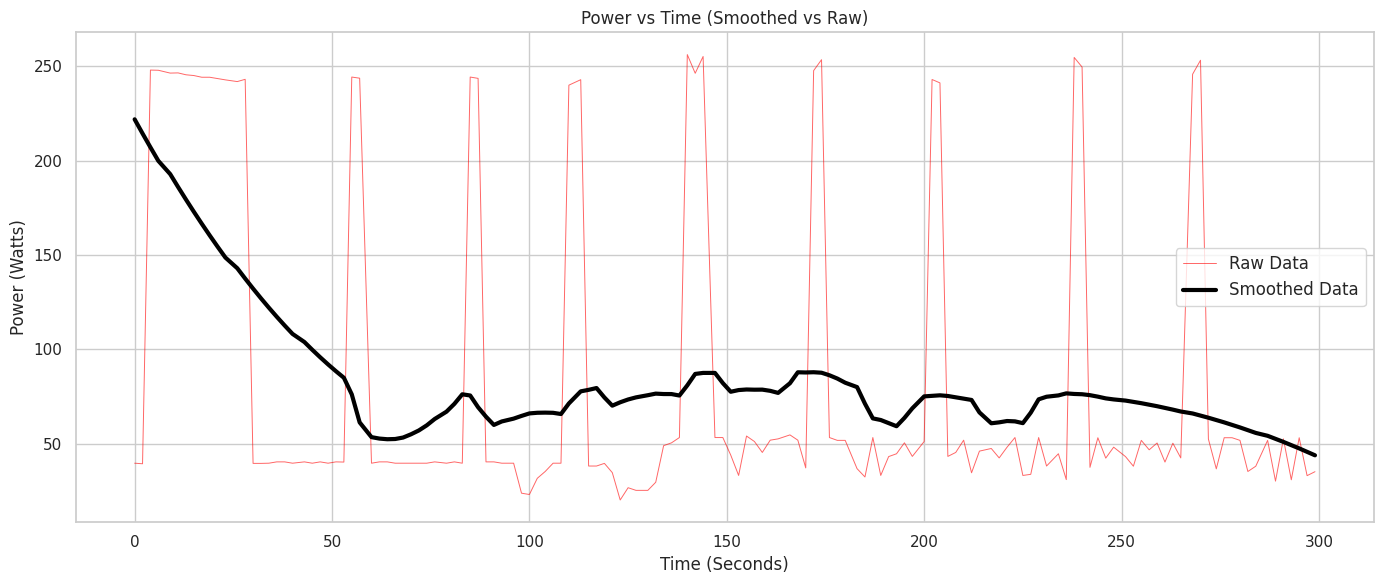

In [225]:
data_subset = data[data['Time_seconds'] <= 300].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data_subset,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data_subset,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [226]:
data['Time_seconds'].max()

13721.0

In [227]:
data['Time_seconds'].max()//60

228.0

In [228]:
data['Power (W)'].mean()

np.float64(78.36662527165477)

In [229]:
data['Cumulative Energy (Wh)'].max() *3.6

1072.2917127861244

# **Compersion Energy Consumption with Layer hieght**

In [230]:
layer_energy = pd.DataFrame({'Layer_hight': [100,200,300], 'Print_time': [228, 128, 108], 'Mean_power' : [79.478, 78.785, 79.478], 'Energy_per_print': [516.168, 627.670, 1072.291]})


In [231]:
layer_energy

,Layer_hight,Print_time,Mean_power,Energy_per_print
0,100,228,79.478,516.168
1,200,128,78.785,627.670
2,300,108,79.478,1072.291


In [232]:
df = pd.DataFrame({
    'Layer_mm': [0.1, 0.2, 0.3],
    'Energy': [516.168, 627.670, 1072.291]
})

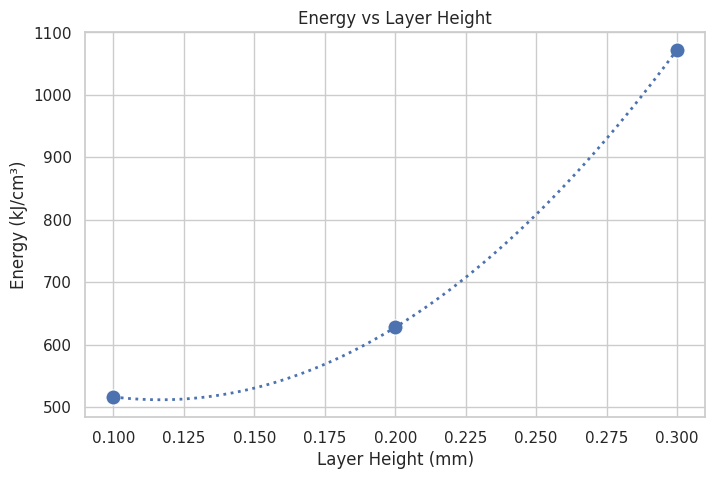

In [233]:
from scipy.interpolate import make_interp_spline

x_smooth = np.linspace(df.Layer_mm.min(), df.Layer_mm.max(), 200)
y_smooth = make_interp_spline(df.Layer_mm, df.Energy, k=2)(x_smooth)

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

sns.scatterplot(data=df, x='Layer_mm', y='Energy', s=120)
sns.lineplot(x=x_smooth, y=y_smooth, linestyle="dotted", linewidth=2)

plt.xlabel("Layer Height (mm)")
plt.ylabel("Energy (kJ/cm³)")
plt.title("Energy vs Layer Height")
plt.show()

# **Experiment - 2**
### **Energy Usage Comparison with baseline**

### **Energy Usage without heating the Bed**

In [234]:
data = pd.read_csv("/content/WIthout_heat_bed.csv")

In [235]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-11-30 21:50:55,23.99,2.10,50.3,0.104,0.001455
1,2025-11-30 21:50:57,24.00,1.41,33.8,2.123,0.021390
2,2025-11-30 21:50:59,24.01,2.13,51.1,2.120,0.051476
3,2025-11-30 21:51:01,24.01,1.50,36.0,2.128,0.072754
4,2025-11-30 21:51:03,24.00,2.22,53.2,2.119,0.104063


In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               3288 non-null   object 
 1   Voltage (V)             3288 non-null   float64
 2   Current (A)             3288 non-null   float64
 3   Power (W)               3288 non-null   float64
 4   Delta Time (s)          3288 non-null   float64
 5   Cumulative Energy (Wh)  3288 non-null   float64
dtypes: float64(5), object(1)
memory usage: 154.3+ KB


In [237]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [238]:
data['Time_seconds'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()

In [239]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh),Time_seconds
0,2025-11-30 21:50:55,23.99,2.10,50.3,0.104,0.001455,0.0
1,2025-11-30 21:50:57,24.00,1.41,33.8,2.123,0.021390,2.0
2,2025-11-30 21:50:59,24.01,2.13,51.1,2.120,0.051476,4.0
3,2025-11-30 21:51:01,24.01,1.50,36.0,2.128,0.072754,6.0
4,2025-11-30 21:51:03,24.00,2.22,53.2,2.119,0.104063,8.0


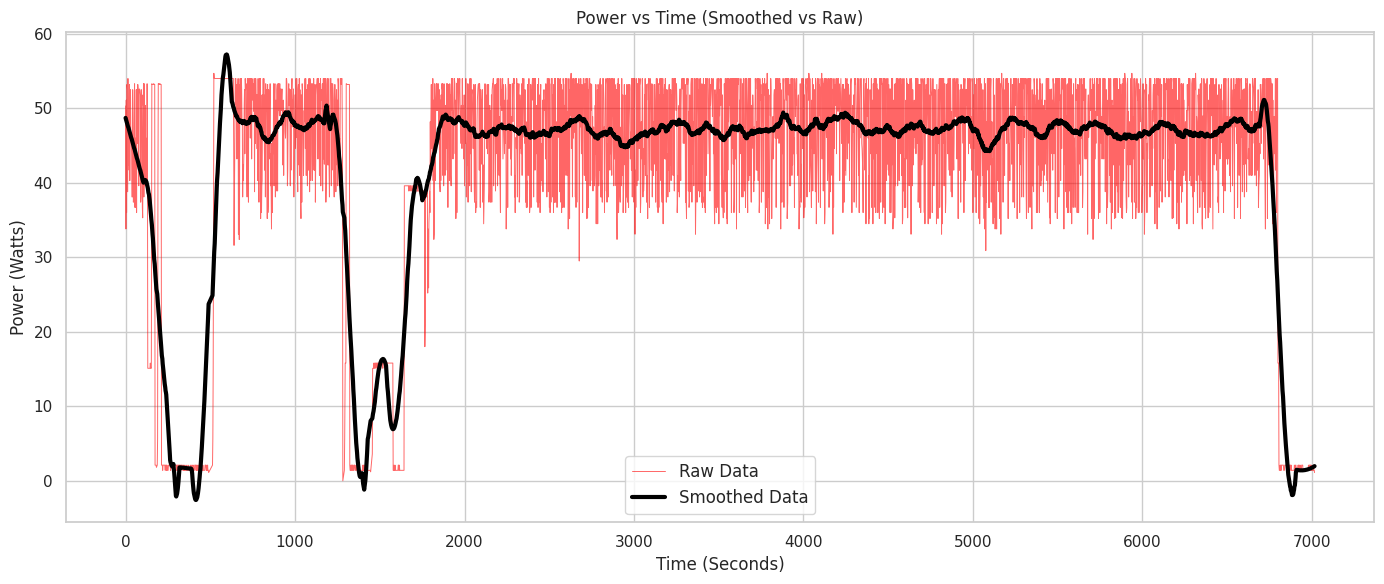

In [242]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 101   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
data['power_smooth'] = savgol_filter(data['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


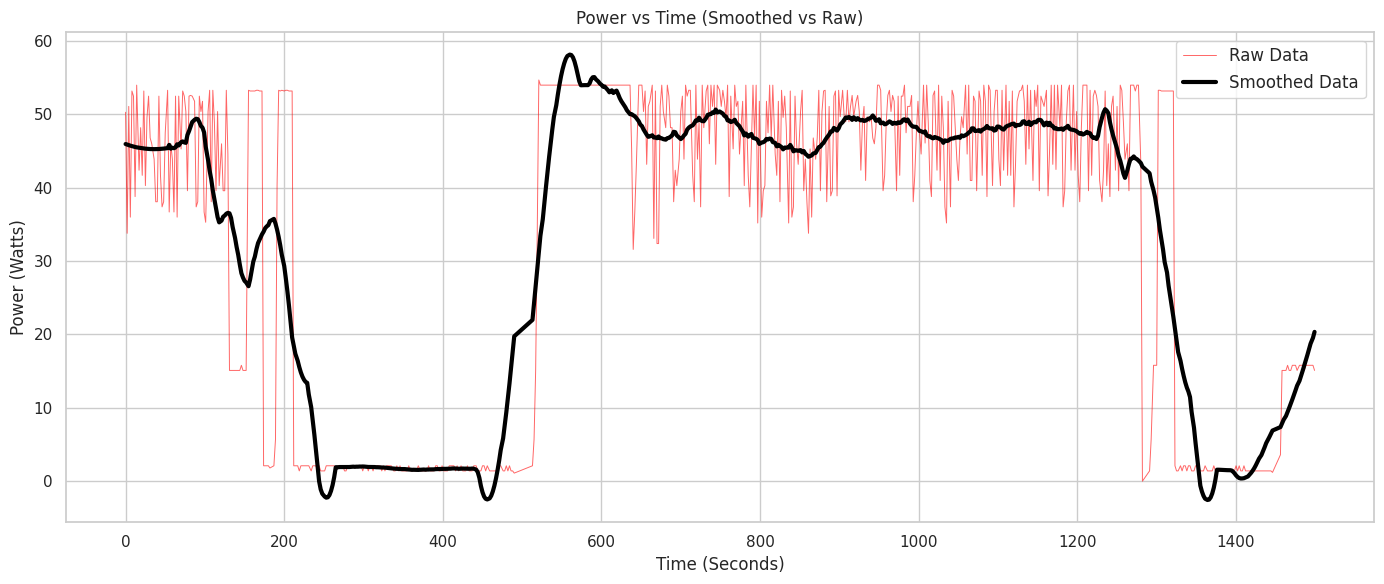

In [243]:
data_subset = data[data['Time_seconds'] <= 1500].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data_subset,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data_subset,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [244]:
data['Time_seconds'].max()

7016.0

In [245]:
data['Time_seconds'].max()//60

116.0

In [246]:
data['Power (W)'].mean()

np.float64(41.825669099756695)

In [247]:
data['Cumulative Energy (Wh)'].max()*3.6

282.9831954990384

### **Energy Usage without heating the Bed and Without heat end (Gohst Mode)**

In [248]:
data = pd.read_csv("/content/without_heatbed_heat_end.csv")

In [249]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-12-01 11:44:19,24.05,0.06,1.4,0.094,0.000037
1,2025-12-01 11:44:21,24.04,0.06,1.4,2.130,0.000865
2,2025-12-01 11:44:23,24.04,0.06,1.4,2.119,0.001689
3,2025-12-01 11:44:25,24.04,0.06,1.4,2.122,0.002514
4,2025-12-01 11:44:27,24.04,0.06,1.4,2.130,0.003342


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               2505 non-null   object 
 1   Voltage (V)             2505 non-null   float64
 2   Current (A)             2505 non-null   float64
 3   Power (W)               2505 non-null   float64
 4   Delta Time (s)          2505 non-null   float64
 5   Cumulative Energy (Wh)  2505 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.6+ KB


In [251]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [252]:
data['Time_seconds'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()

In [253]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh),Time_seconds
0,2025-12-01 11:44:19,24.05,0.06,1.4,0.094,0.000037,0.0
1,2025-12-01 11:44:21,24.04,0.06,1.4,2.130,0.000865,2.0
2,2025-12-01 11:44:23,24.04,0.06,1.4,2.119,0.001689,4.0
3,2025-12-01 11:44:25,24.04,0.06,1.4,2.122,0.002514,6.0
4,2025-12-01 11:44:27,24.04,0.06,1.4,2.130,0.003342,8.0


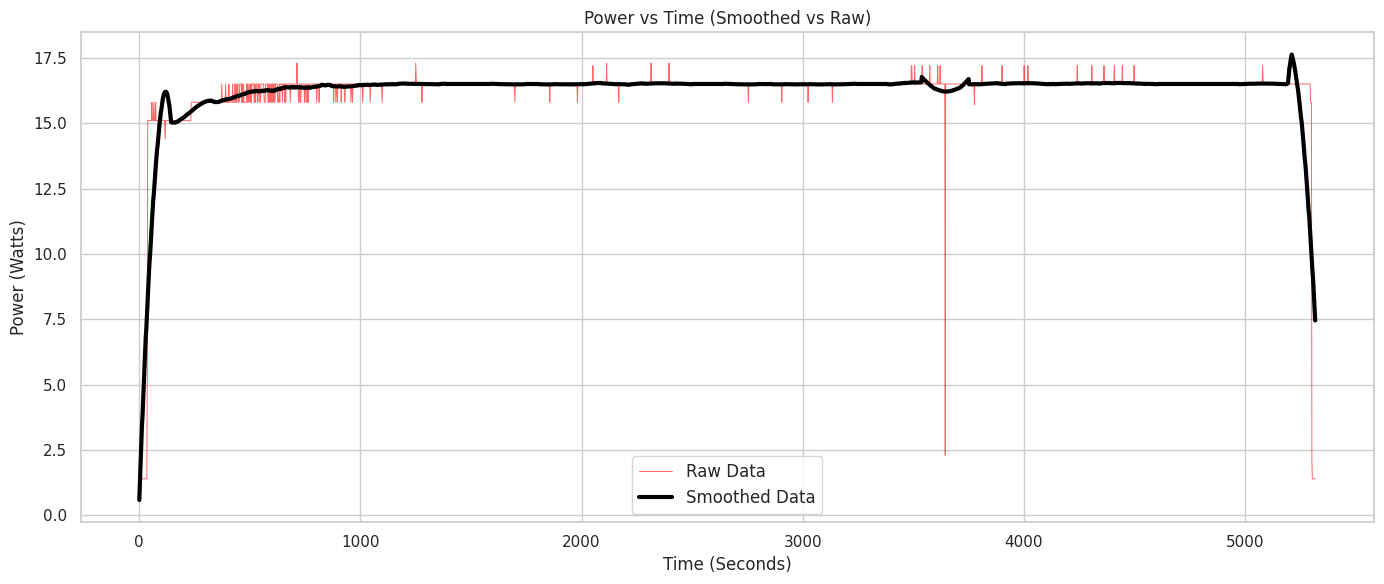

In [256]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 101   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
data['power_smooth'] = savgol_filter(data['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


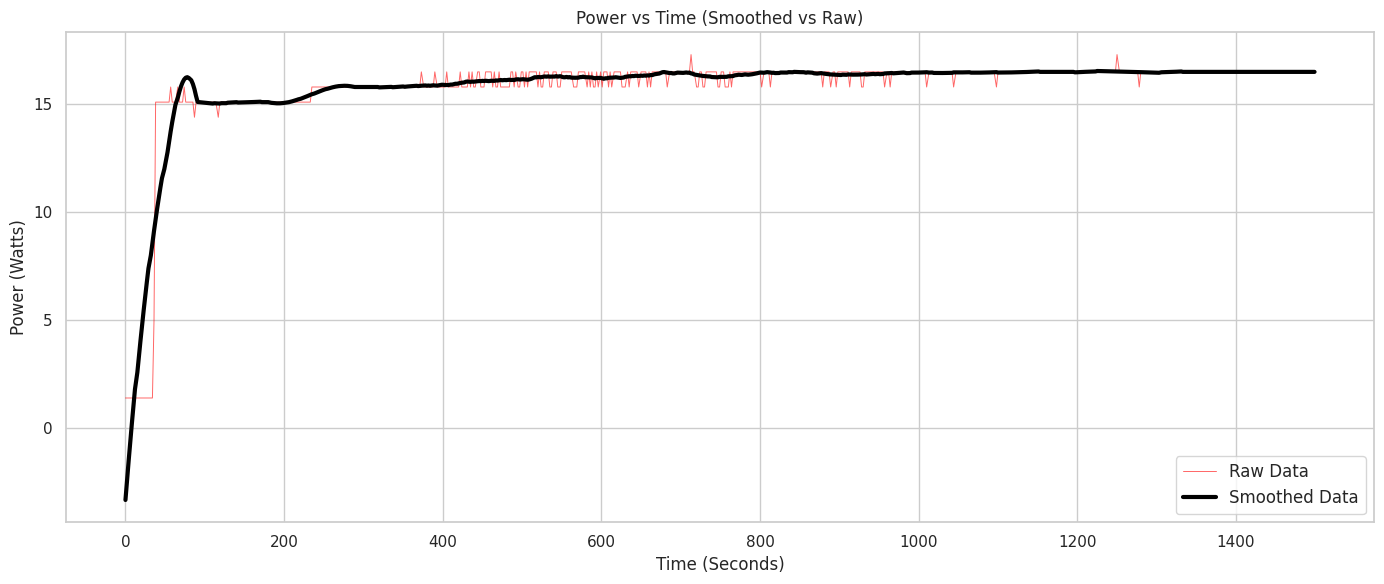

In [257]:
data_subset = data[data['Time_seconds'] <= 1500].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data_subset,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data_subset,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [258]:
data['Time_seconds'].max()

5317.0

In [259]:
data['Time_seconds'].max()//60

88.0

In [260]:
data['Power (W)'].mean()

np.float64(16.246626746506987)

In [261]:
data['Cumulative Energy (Wh)'].max()*3.6

86.42233804881603

In [262]:
energy_usage = pd.DataFrame({
    "Components" : ["Heated bed","Hot_end_extruder", "Motor_Control_board_Fans"],
    "Percentage_of_energy_usage" : [42.1, 41.2, 16.7]
})
energy_usage

,Components,Percentage_of_energy_usage
0,Heated bed,42.1
1,Hot_end_extruder,41.2
2,Motor_Control_board_Fans,16.7


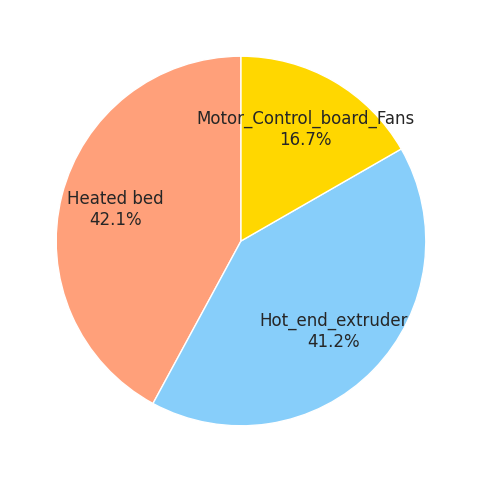

In [263]:
import matplotlib.pyplot as plt

labels = energy_usage["Components"]
sizes = energy_usage["Percentage_of_energy_usage"]
colors = ["#FFA07A", "#87CEFA", "#FFD700"]   # simple color scheme

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.7
)

# Put component names inside slices
for i, a in enumerate(autotexts):
    a.set_text(f"{labels[i]}\n{sizes[i]:.1f}%")

plt.show()


In [264]:
data = pd.read_csv("/content/Insulation_result.csv")

In [265]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh)
0,2025-12-01 15:13:39,23.92,10.53,251.8,0.101,0.007080
1,2025-12-01 15:13:41,23.93,10.50,251.2,2.124,0.155284
2,2025-12-01 15:13:43,23.93,10.50,251.2,2.133,0.304093
3,2025-12-01 15:13:45,23.93,10.47,250.5,2.121,0.451646
4,2025-12-01 15:13:47,24.01,1.65,39.6,2.125,0.475018


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               2774 non-null   object 
 1   Voltage (V)             2774 non-null   float64
 2   Current (A)             2774 non-null   float64
 3   Power (W)               2774 non-null   float64
 4   Delta Time (s)          2774 non-null   float64
 5   Cumulative Energy (Wh)  2774 non-null   float64
dtypes: float64(5), object(1)
memory usage: 130.2+ KB


In [267]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [268]:
data['Time_seconds'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()

In [269]:
data.head()

,Timestamp,Voltage (V),Current (A),Power (W),Delta Time (s),Cumulative Energy (Wh),Time_seconds
0,2025-12-01 15:13:39,23.92,10.53,251.8,0.101,0.007080,0.0
1,2025-12-01 15:13:41,23.93,10.50,251.2,2.124,0.155284,2.0
2,2025-12-01 15:13:43,23.93,10.50,251.2,2.133,0.304093,4.0
3,2025-12-01 15:13:45,23.93,10.47,250.5,2.121,0.451646,6.0
4,2025-12-01 15:13:47,24.01,1.65,39.6,2.125,0.475018,8.0


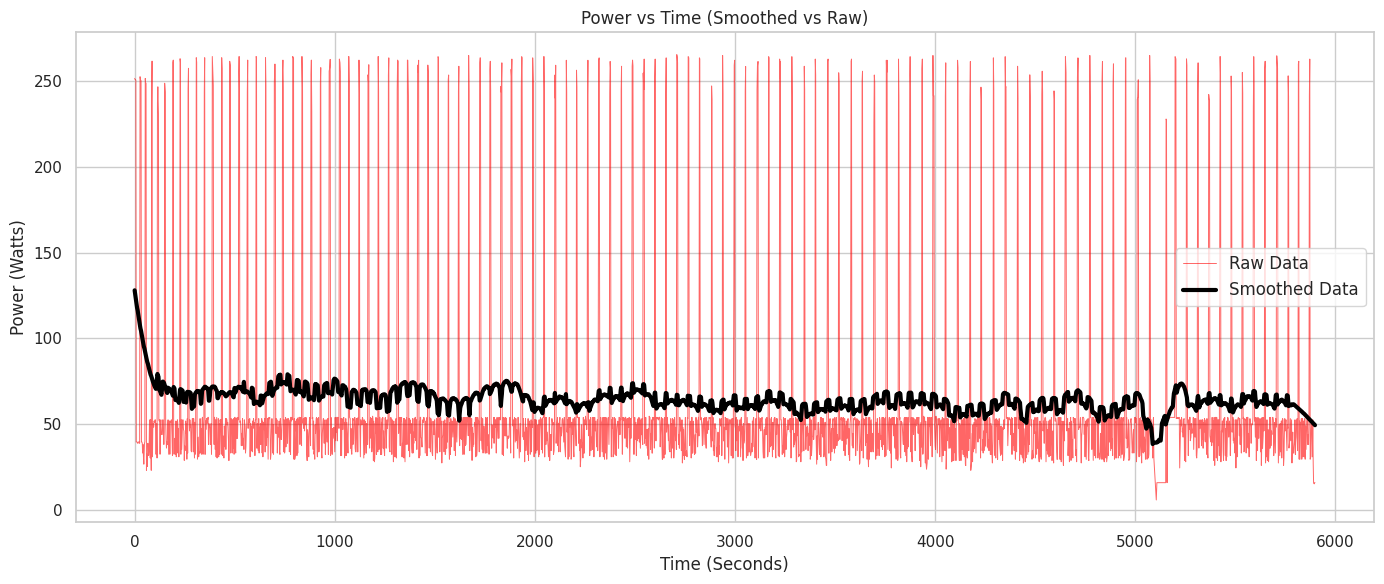

In [272]:
from scipy.signal import savgol_filter

# ---- SETTINGS ----
window_length = 101   # must be odd and <= dataset size
poly_order = 2        # polynomial fitting order

# Apply Savitzky–Golay smoothing
data['power_smooth'] = savgol_filter(data['Power (W)'], window_length, poly_order)

# ---- PLOT ----
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


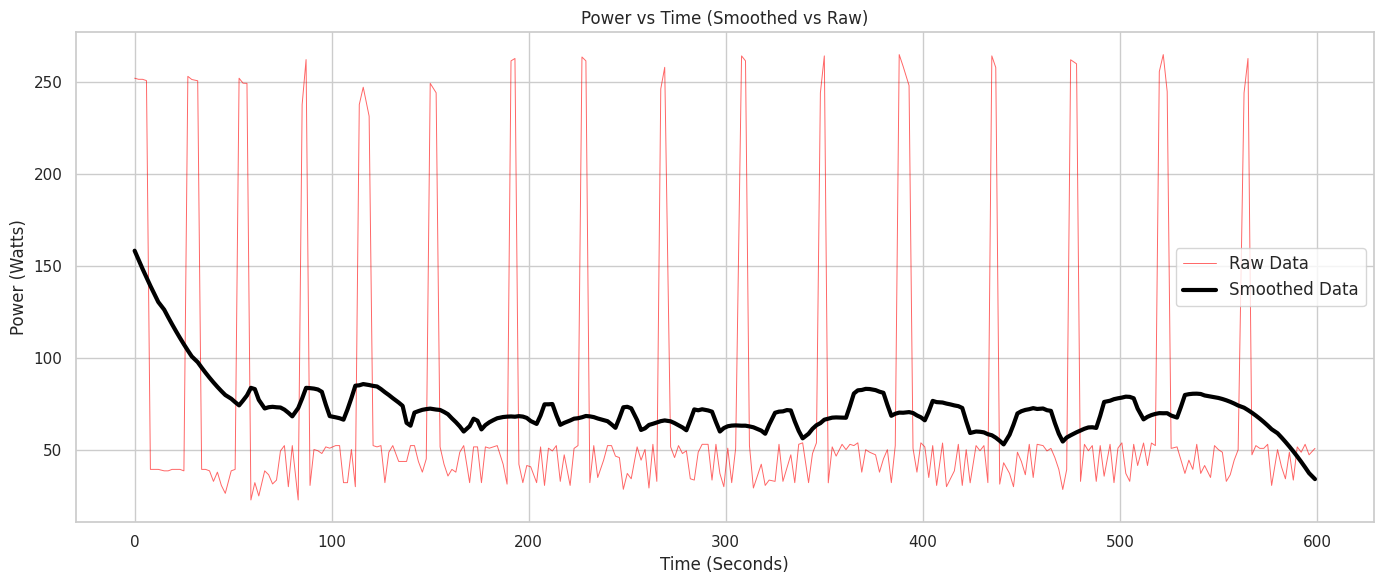

In [278]:
data_subset = data[data['Time_seconds'] <= 600].copy()
data_subset['power_smooth'] = savgol_filter(data_subset['Power (W)'], 51, 2)

# plotting code uses df_subset instead of df
plt.figure(figsize=(14,6))
sns.set(style="whitegrid")

# Raw Data (thin line, transparent)
sns.lineplot(x='Time_seconds', y='Power (W)', data=data_subset,
             linewidth=0.7, color='red', alpha=0.6, label='Raw Data')

# Smoothed Data (thick bold line)
sns.lineplot(x='Time_seconds', y='power_smooth', data=data_subset,
             linewidth=3, color='black', label='Smoothed Data')

# Labels and formatting
plt.xlabel("Time (Seconds)")
plt.ylabel("Power (Watts)")
plt.title("Power vs Time (Smoothed vs Raw)")

# Improve readability
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



In [274]:
data['Time_seconds'].max()

5898.0

In [275]:
data['Time_seconds'].max()//60

98.0

In [276]:
data['Power (W)'].mean()

np.float64(64.25922855082914)

In [277]:
data['Cumulative Energy (Wh)'].max()*3.6

378.0329130965228

In [279]:
energy_compresion = pd.DataFrame({
    "print_mode" : [" Baseline", "Insulated", "No heated bed", "Ghost"],
    "energy_consumption" : [516.168, 378.032, 298.98, 86.422]
})
energy_compresion

,print_mode,energy_consumption
0,Baseline,516.168
1,Insulated,378.032
2,No heated bed,298.980
3,Ghost,86.422


/tmp/ipython-input-4132207895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='print_mode', y = 'energy_consumption', data = energy_compresion, palette="viridis")


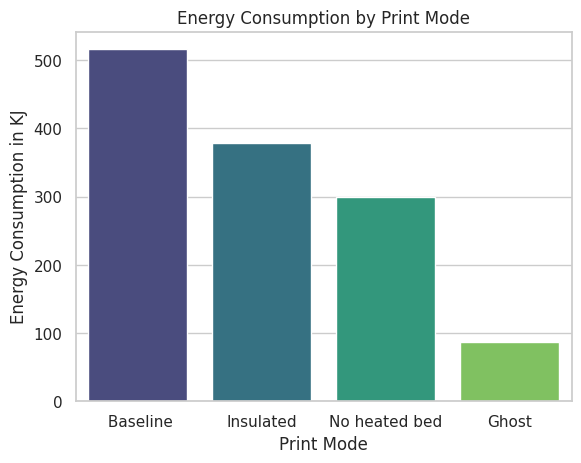

In [281]:
sns.barplot(x='print_mode', y = 'energy_consumption', data = energy_compresion, palette="viridis")
plt.xlabel("Print Mode")
plt.ylabel("Energy Consumption in KJ")
plt.title("Energy Consumption by Print Mode")
plt.show()